# Library import and data set preparation

In [1]:
import pandas as pd

In [2]:
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [3]:
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

In [4]:
from scipy import stats

In [5]:
# data set load and transformation

In [6]:
df = pd.read_csv("bia_daily_wc_2021.csv")

In [7]:
df["d_date"] = pd.to_datetime(df["d_date"])

In [8]:
df.set_index("d_date", inplace=True)

In [9]:
df

,revenue
d_date,
2021-01-01,28955.64045
2021-01-02,44780.01737
2021-01-03,46144.57494
2021-01-04,45024.70622
2021-01-05,40427.56300
...,...
2021-12-27,47611.10400
2021-12-28,45468.07700
2021-12-29,38038.67900


# Seasonal decomposition

In [10]:
decomposition = sm.tsa.seasonal_decompose(df['revenue'],model='additive',extrapolate_trend ='freq')

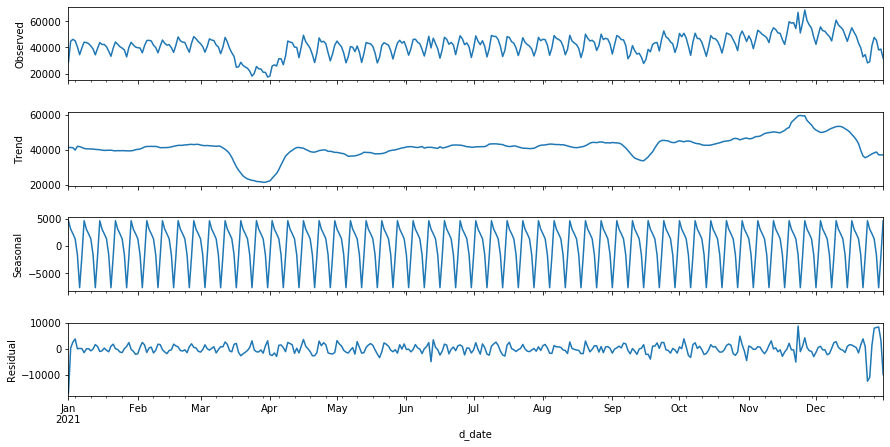

In [11]:
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

In [12]:
decomposition.nobs

365

In [13]:
decomposition.seasonal

d_date
2021-01-01    4597.975590
2021-01-02    3061.639722
2021-01-03    2218.334332
2021-01-04    1287.221026
2021-01-05   -1645.007758
                 ...     
2021-12-27    1287.221026
2021-12-28   -1645.007758
2021-12-29   -7621.341219
2021-12-30   -1898.821691
2021-12-31    4597.975590
Name: revenue, Length: 365, dtype: float64

In [14]:
decomposition.trend

d_date
2021-01-01    41434.641668
2021-01-02    41373.444927
2021-01-03    41312.248186
2021-01-04    39914.552684
2021-01-05    42061.821087
                  ...     
2021-12-27    38353.925286
2021-12-28    38859.376429
2021-12-29    37216.552393
2021-12-30    37193.880908
2021-12-31    37171.209423
Name: revenue, Length: 365, dtype: float64

In [15]:
decomposition.resid

d_date
2021-01-01   -17076.976808
2021-01-02      344.932721
2021-01-03     2613.992423
2021-01-04     3822.932510
2021-01-05       10.749671
                  ...     
2021-12-27     7969.957689
2021-12-28     8253.708330
2021-12-29     8443.467826
2021-12-30     3413.584783
2021-12-31    -9976.865013
Name: revenue, Length: 365, dtype: float64

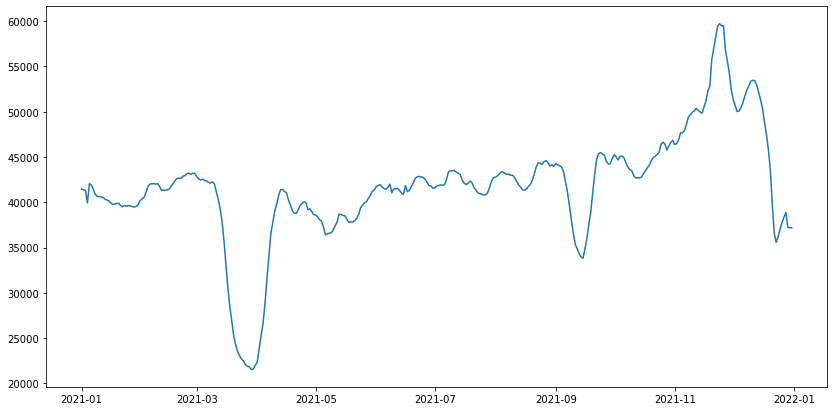

In [16]:
fign = plt.figure() 
fign.set_size_inches(14, 7)
plt.plot(decomposition.trend)

# Trend calculation

## linear regression

In [17]:
res = stats.linregress(list(map(lambda x: int(x.strftime('%Y%m%d')), decomposition.trend.index.tolist())), decomposition.trend.values)

In [18]:
res

LinregressResult(slope=9.588336889937949, intercept=-193744984.373404, rvalue=0.5354723646368477, pvalue=1.801193755144346e-28, stderr=0.7937426015181824)

In [19]:
x = list(map(lambda x: int(x.strftime('%Y%m%d')), decomposition.trend.index.tolist()))
x_trend = list(map(lambda x: int(x.strftime('%Y%m%d'))* res.slope + res.intercept, decomposition.trend.index.tolist())) #  * res.slope + res.intercept

In [20]:
x_trend

[36272.594267845154,
 36282.18260473013,
 36291.770941615105,
 36301.35927850008,
 36310.947615385056,
 36320.53595229983,
 36330.12428918481,
 36339.712626069784,
 36349.30096295476,
 36358.889299839735,
 36368.47763672471,
 36378.06597363949,
 36387.654310524464,
 36397.24264740944,
 36406.830984294415,
 36416.41932117939,
 36426.007658064365,
 36435.59599497914,
 36445.18433186412,
 36454.772668749094,
 36464.36100563407,
 36473.949342519045,
 36483.53767940402,
 36493.1260163188,
 36502.71435320377,
 36512.30269008875,
 36521.891026973724,
 36531.4793638587,
 36541.067700743675,
 36550.65603765845,
 36560.24437454343,
 37231.427956819534,
 37241.01629373431,
 37250.60463061929,
 37260.19296750426,
 37269.78130438924,
 37279.369641274214,
 37288.95797815919,
 37298.54631507397,
 37308.13465195894,
 37317.72298884392,
 37327.31132572889,
 37336.89966261387,
 37346.487999498844,
 37356.07633641362,
 37365.6646732986,
 37375.25301018357,
 37384.84134706855,
 37394.42968395352,
 37404.0

## Plot

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


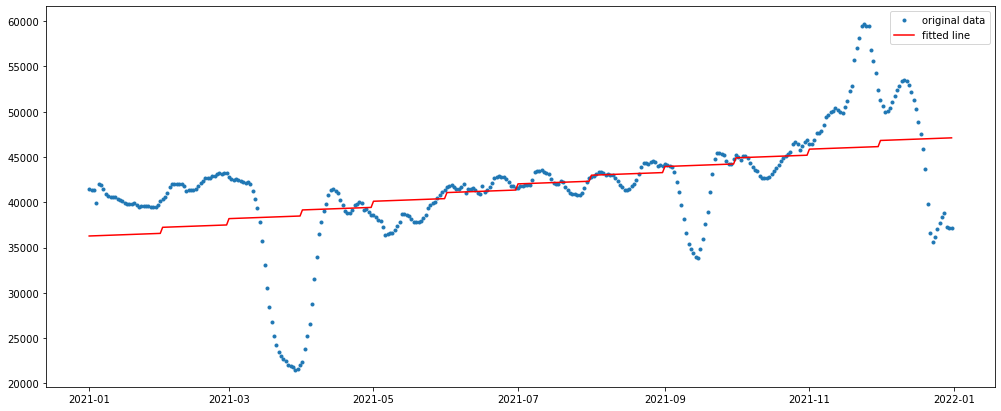

In [21]:
plt.figure(figsize=(17, 7))
plt.plot(decomposition.trend.index, decomposition.trend.values, '.', label='original data')
plt.plot(decomposition.trend.index, x_trend, 'r', label='fitted line')
plt.legend()
plt.show()

# Forecast

In [22]:
incr_perc = 1+ (max(x_trend) - min(x_trend))/min(x_trend)

In [23]:
incr_perc

1.298705424972316

In [24]:
nn_sim = decomposition.trend.values * incr_perc

In [25]:
series = pd.Series(nn_sim)

In [26]:
nnt = list(map(lambda x: x + relativedelta(years=1), decomposition.trend.index))

In [27]:
series.index = nnt

In [28]:
series

2022-01-01    53811.393916
2022-01-02    53731.917376
2022-01-03    53652.440837
2022-01-04    51837.246106
2022-01-05    54625.915230
                  ...     
2022-12-27    49810.450838
2022-12-28    50466.882979
2022-12-29    48333.338491
2022-12-30    48303.894911
2022-12-31    48274.451331
Length: 365, dtype: float64

In [29]:
# next year
nn = list(map(lambda x: x+10000, x))
nni = list(map(lambda x: int(x.strftime('%Y%m%d'))* res.slope + -193830032.97, series.index)) #  new intercept due to linear regression limitation on time series X

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


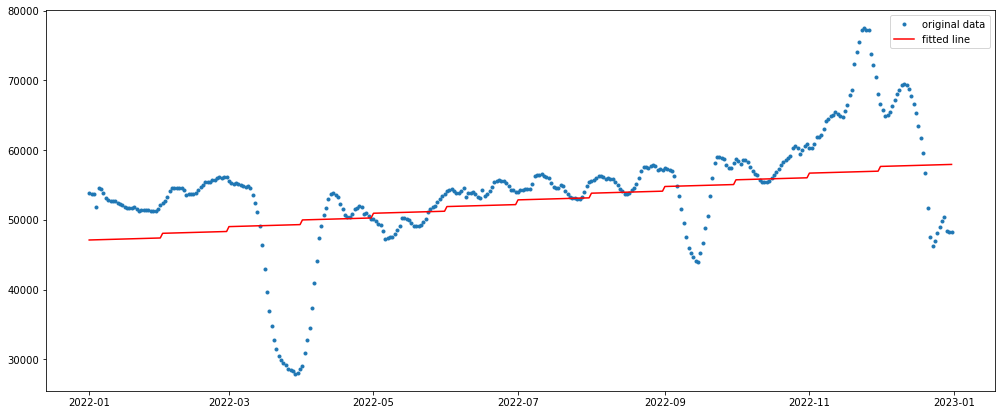

In [30]:
plt.figure(figsize=(17, 7))
plt.plot(series.index, series.values, '.', label='original data')
plt.plot(series.index, nni, 'r', label='fitted line')
plt.legend()
plt.show()

# Final output

## Original data

In [31]:
orig_value = pd.concat([pd.Series(decomposition.trend.values),  pd.Series(x_trend)], axis=1)

In [32]:
orig_value.index = decomposition.trend.index

In [33]:
orig_value.rename(columns = {0:'Original Data',1:'Trend'}, inplace = True)

In [34]:
orig_value['Seasonal'] = orig_value['Original Data'] + decomposition.seasonal.values

In [35]:
orig_value

,Original Data,Trend,Seasonal
d_date,,,
2021-01-01,41434.641668,36272.594268,46032.617258
2021-01-02,41373.444927,36282.182605,44435.084649
2021-01-03,41312.248186,36291.770942,43530.582517
2021-01-04,39914.552684,36301.359279,41201.773710
2021-01-05,42061.821087,36310.947615,40416.813329
...,...,...,...
2021-12-27,38353.925286,47069.061606,39641.146311
2021-12-28,38859.376429,47078.649943,37214.368670
2021-12-29,37216.552393,47088.238280,29595.211174


## Forecasted data

In [36]:
tre = pd.Series(nni)
tre.index = series.index

In [37]:
forecasted = pd.concat([series, tre], axis=1)

In [38]:
forecasted

,0,1
2022-01-01,53811.393916,47107.366571
2022-01-02,53731.917376,47116.954908
2022-01-03,53652.440837,47126.543245
2022-01-04,51837.246106,47136.131582
2022-01-05,54625.915230,47145.719919
...,...,...
2022-12-27,49810.450838,57903.833909
2022-12-28,50466.882979,57913.422246
2022-12-29,48333.338491,57923.010583
2022-12-30,48303.894911,57932.598920


In [39]:
forecasted.rename(columns = {0:'Original Data',1:'Trend'}, inplace = True)

In [40]:
forecasted['Seasonal'] = forecasted['Original Data'] + decomposition.seasonal.values

In [41]:
forecasted

,Original Data,Trend,Seasonal
2022-01-01,53811.393916,47107.366571,58409.369506
2022-01-02,53731.917376,47116.954908,56793.557098
2022-01-03,53652.440837,47126.543245,55870.775168
2022-01-04,51837.246106,47136.131582,53124.467132
2022-01-05,54625.915230,47145.719919,52980.907472
...,...,...,...
2022-12-27,49810.450838,57903.833909,51097.671863
2022-12-28,50466.882979,57913.422246,48821.875220
2022-12-29,48333.338491,57923.010583,40711.997272
2022-12-30,48303.894911,57932.598920,46405.073220


## Combined

In [42]:
final = pd.concat([orig_value, forecasted], axis=0)

In [43]:
final

,Original Data,Trend,Seasonal
2021-01-01,41434.641668,36272.594268,46032.617258
2021-01-02,41373.444927,36282.182605,44435.084649
2021-01-03,41312.248186,36291.770942,43530.582517
2021-01-04,39914.552684,36301.359279,41201.773710
2021-01-05,42061.821087,36310.947615,40416.813329
...,...,...,...
2022-12-27,49810.450838,57903.833909,51097.671863
2022-12-28,50466.882979,57913.422246,48821.875220
2022-12-29,48333.338491,57923.010583,40711.997272
2022-12-30,48303.894911,57932.598920,46405.073220


/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


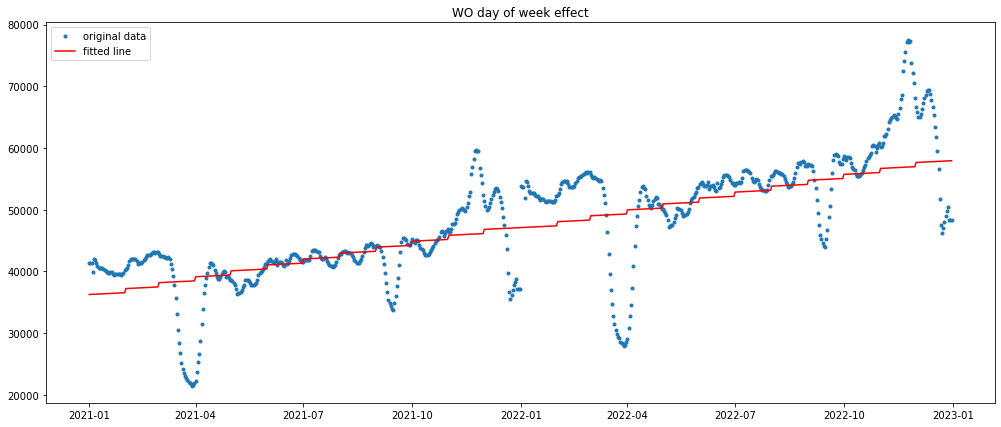

In [44]:
plt.figure(figsize=(17, 7))
plt.plot(final.index, final['Original Data'], '.', label='original data')
plt.plot(final.index, final['Trend'], 'r', label='fitted line')
plt.title('WO day of week effect')
plt.legend()
plt.show()

/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


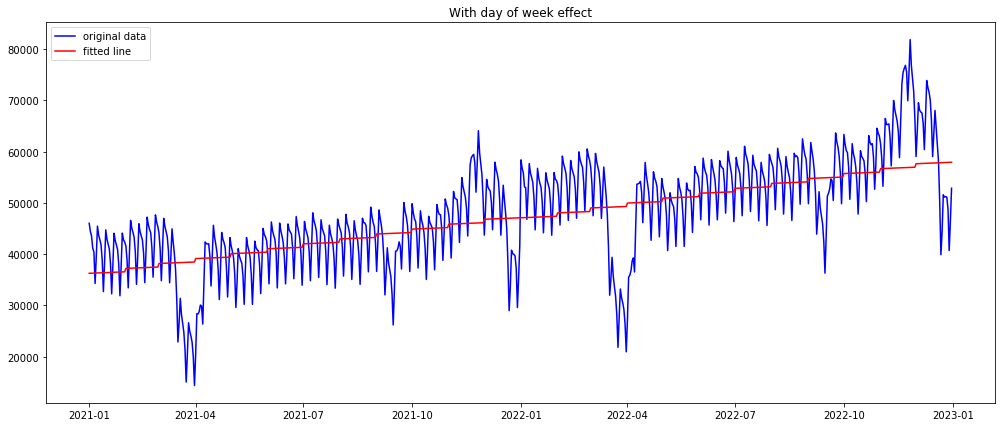

In [45]:
plt.figure(figsize=(17, 7))
plt.plot(final.index, final['Seasonal'], 'b', label='original data')
plt.plot(final.index, final['Trend'], 'r', label='fitted line')
plt.title('With day of week effect')
plt.legend()
plt.show()

In [46]:
final.to_excel (r'ForecastedData.xlsx', index=True)